### 1. Import libraries and Dataset ###

In [2]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


'c:\Users\Liv' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
cleaned_loan = pd.read_csv('../.Database/cleaned_loan.csv')

### 2. Understanding Data ###

In [5]:
print("File size: ", cleaned_loan.shape)

File size:  (256629, 25)


In [6]:
# Display the first few rows
print("head: ", cleaned_loan.head())

head:     annual_inc  delinq_2yrs    dti             emp_title emp_length  \
0     24000.0          0.0  27.65                   NaN  10+ years   
1     30000.0          0.0   1.00                 Ryder   < 1 year   
2     12252.0          0.0   8.72                   NaN  10+ years   
3     49200.0          0.0  20.00   AIR RESOURCES BOARD  10+ years   
4     36000.0          0.0  11.20  Veolia Transportaton    3 years   

   funded_amnt grade home_ownership  inq_last_6mths  installment  ...  \
0       5000.0     B           RENT             1.0       162.87  ...   
1       2500.0     C           RENT             5.0        59.83  ...   
2       2400.0     C           RENT             2.0        84.33  ...   
3      10000.0     C           RENT             1.0       339.31  ...   
4       5000.0     A           RENT             3.0       156.46  ...   

   pub_rec         purpose  sub_grade        term  \
0      0.0     credit_card         B2   36 months   
1      0.0             car 

In [7]:
# Display data types and non-null counts
print("Info: ", cleaned_loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256629 entries, 0 to 256628
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   annual_inc              256629 non-null  float64
 1   delinq_2yrs             256629 non-null  float64
 2   dti                     256629 non-null  float64
 3   emp_title               252287 non-null  object 
 4   emp_length              256629 non-null  object 
 5   funded_amnt             256629 non-null  float64
 6   grade                   256629 non-null  object 
 7   home_ownership          256629 non-null  object 
 8   inq_last_6mths          256629 non-null  float64
 9   installment             256629 non-null  float64
 10  int_rate                256629 non-null  float64
 11  issue_d                 256629 non-null  object 
 12  loan_amnt               256629 non-null  float64
 13  loan_status             256629 non-null  object 
 14  mths_since_last_deli

In [8]:
# Display basic statistics
print("Describe: ", cleaned_loan.describe())

Describe:           annual_inc    delinq_2yrs            dti    funded_amnt  \
count  2.566290e+05  256629.000000  256629.000000  256629.000000   
mean   7.342966e+04       0.257562      16.613058   13680.459535   
std    5.913843e+04       0.756024       7.817117    8147.977702   
min    1.896000e+03       0.000000       0.000000     500.000000   
25%    4.500000e+04       0.000000      10.810000    7500.000000   
50%    6.300000e+04       0.000000      16.270000   12000.000000   
75%    8.800000e+04       0.000000      22.070000   18600.000000   
max    8.706582e+06      29.000000      39.990000   35000.000000   

       inq_last_6mths    installment       int_rate      loan_amnt  \
count   256629.000000  256629.000000  256629.000000  256629.000000   
mean         0.887690     422.169060      13.863413   13722.050801   
std          1.157377     245.768534       4.409160    8168.943663   
min          0.000000      15.670000       5.320000     500.000000   
25%          0.000000     

In [9]:
# Check for missing values
print(cleaned_loan.isnull().sum())

annual_inc                   0
delinq_2yrs                  0
dti                          0
emp_title                 4342
emp_length                   0
funded_amnt                  0
grade                        0
home_ownership               0
inq_last_6mths               0
installment                  0
int_rate                     0
issue_d                      0
loan_amnt                    0
loan_status                  0
mths_since_last_delinq       0
pub_rec                      0
purpose                      0
sub_grade                    0
term                         0
title                       15
total_acc                    0
total_pymnt                  0
acc_now_delinq               0
log_annual_inc               0
loan_status_grouped          0
dtype: int64


Since our dataset is already cleaned, most of our variables do not have missing values. In our analysis, we chose not to address missing values in the \`emp_title\` and \`title\` since these variables are categorical with potentially high cardinality and have limited predictive power for our target variable, \`loan_status\`. 


### 3. Univariate Data Analysis ###

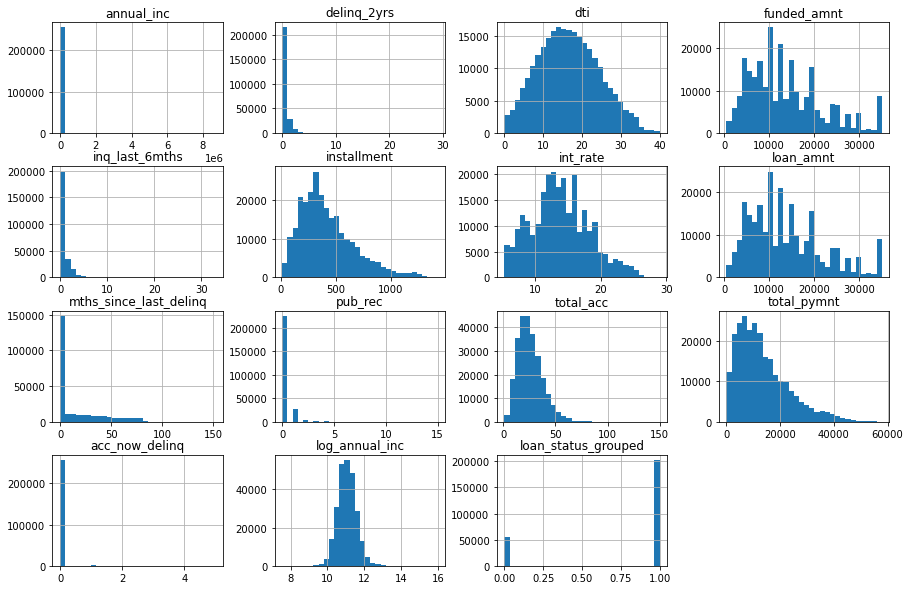

In [10]:
# Histogram for numerical columns
cleaned_loan.hist(bins=30, figsize=(15, 10))
plt.show()

Loan_status_grouped is categorical variable, not numerical variable. 0 means default, 1 means fully paid or expected to fully paid.

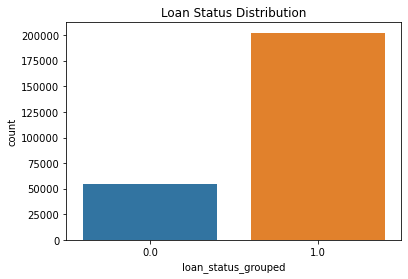

In [12]:
# Count plot for the target variable 'loan_status'
sns.countplot(x='loan_status_grouped', data=cleaned_loan)
plt.title('Loan Status Distribution')


plt.show()

### 4. Bivariate Data Analysis ###

#### 4.1 Annual Income by Loan Status ####

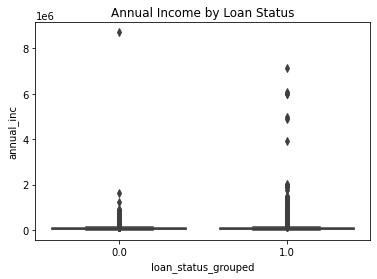

In [14]:
# Box plot for numerical variables against 'loan_status'
sns.boxplot(x='loan_status_grouped', y='annual_inc', data=cleaned_loan)
plt.title('Annual Income by Loan Status')
plt.show()

There are significant outliers in the "Fully Paid" category, indicating that some borrowers with very high incomes fully repay their loans. This could suggest that higher income might contribute to the ability to repay loans, but it's not exclusive to this category.

The interquartile range (IQR) is narrow for all categories, showing that most borrowers have a similar range of incomes across different loan statuses. However, the positive skew in income distribution could imply that few borrowers have significantly higher incomes.

The median annual income appears similar across all loan status categories, does this mean that annual income is not a strong candidate variable to predict loan status? Let's see how close they are.


In [103]:
# Group by loan status and calculate the median of annual income
median_income_by_status = cleaned_loan2.groupby('loan_status')['annual_inc'].median()

# Display the median incomes
print(median_income_by_status)

loan_status
Charged Off           58000.0
Fully Paid            65000.0
Late (31-120 days)    60000.0
Name: annual_inc, dtype: float64


The higher the median annual income, the more likely the borrowers are going to fully pay the debt. Hence, annual income remains a strong candidate variable in predicting loan status. Next, we will investigate loan status by grade.

#### 4.2 Box Plots and Violin Plots ####

In [15]:
# Extract numerical features from cleaned_data2
numerical_features = cleaned_loan.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the list of numerical features
print("Number of Numerical Features: ", len(numerical_features))
print("Numerical Features:", numerical_features)

Number of Numerical Features:  15
Numerical Features: ['annual_inc', 'delinq_2yrs', 'dti', 'funded_amnt', 'inq_last_6mths', 'installment', 'int_rate', 'loan_amnt', 'mths_since_last_delinq', 'pub_rec', 'total_acc', 'total_pymnt', 'acc_now_delinq', 'log_annual_inc', 'loan_status_grouped']


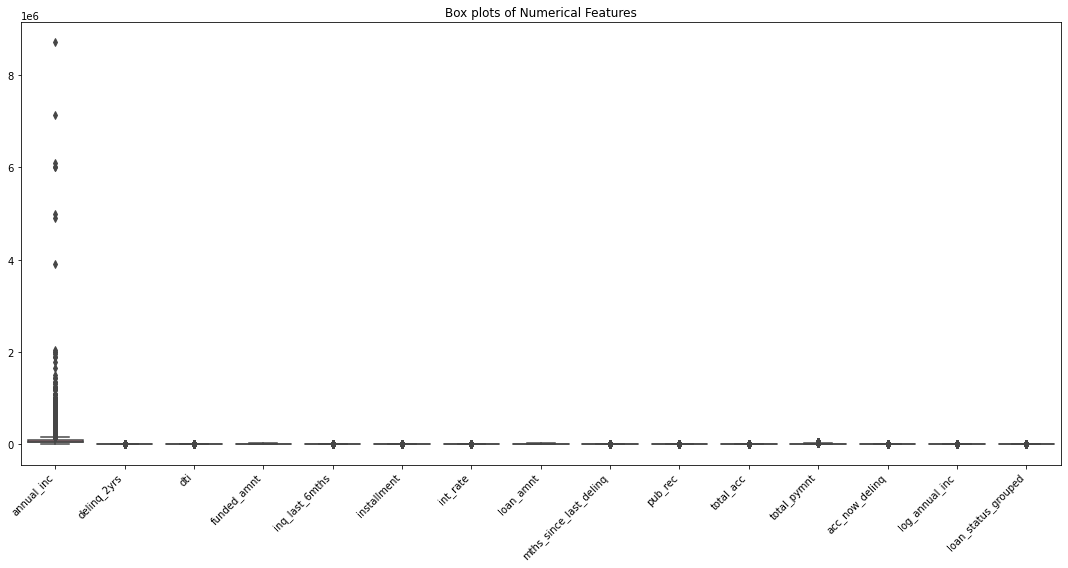

In [16]:
# Boxplots
plt.figure(figsize=(15, 8))  
sns.boxplot(data=cleaned_loan[numerical_features])
plt.xticks(rotation=45, ha='right')  
plt.title('Box plots of Numerical Features')
plt.tight_layout()  
plt.show()

Let's remove annual_inc and plot again.

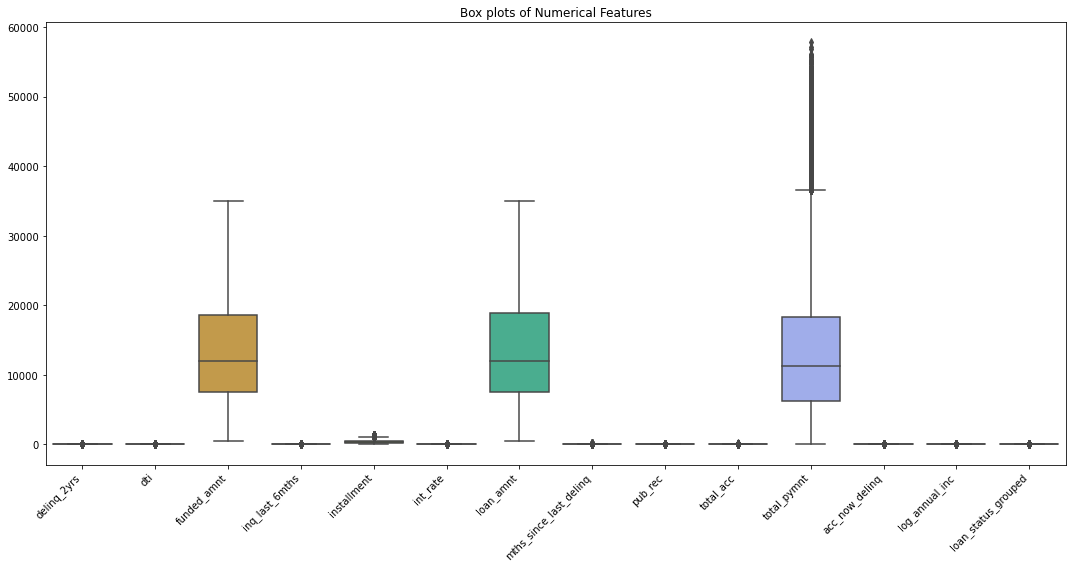

In [17]:
# Boxplots
plt.figure(figsize=(15, 8))  
numerical_features1 = numerical_features[1:]
sns.boxplot(data=cleaned_loan[numerical_features1])
plt.xticks(rotation=45, ha='right')  
plt.title('Box plots of Numerical Features')
plt.tight_layout()  
plt.show()

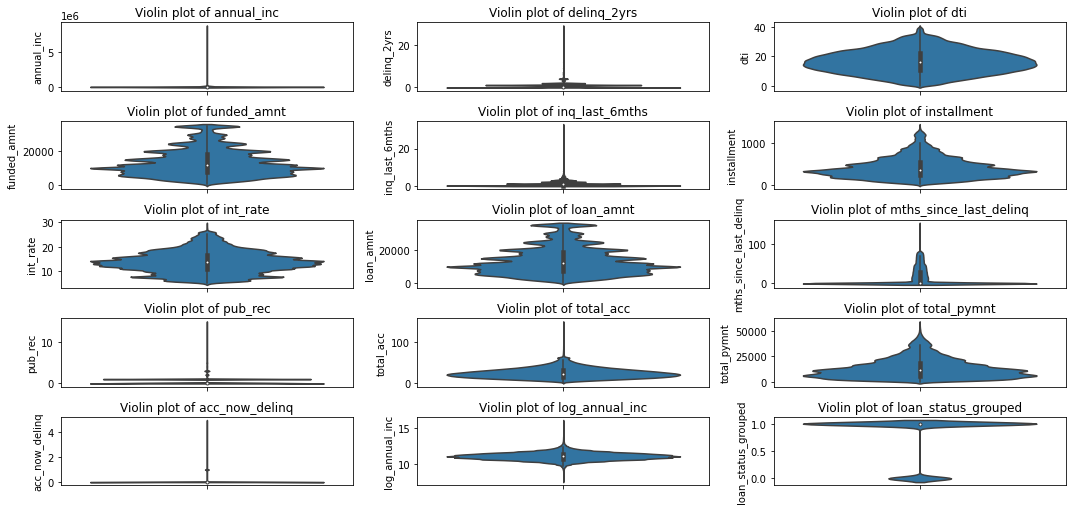

In [18]:
# Violin plot
plt.figure(figsize=(15, 7))  # Increase the figure size for better readability

# Calculate the number of rows needed
n_features = len(numerical_features)
n_cols = 3  # Set the number of columns for subplots
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate rows needed

for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)  # Adjust subplot grid
    sns.violinplot(data=cleaned_loan, y=feature)
    plt.title(f'Violin plot of {feature}')
    plt.xticks(rotation=45)  # Rotate x-ticks if needed

plt.tight_layout()  # Adjust the layout to prevent clipping
plt.show()

From the violin plot we observe that:

annual_inc show skewness, hence logging to log_annual_inc helps normalize it.

funded_amnt, loan_amnt and installment have a more symmetrical distribution, indicating that the central tendency is well-defined, with some variability.

int_rate and dti shows a fairly normal distribution, centered around a specific range, with some variation.

total_pymnt shows a wide distribution, possibly due to variations in loan amounts and repayment terms.

Furthermore, features related to delinquencies and inquiries (delinq_2yrs, inq_last_6mths, mths_since_last_delinq, pub_rec, total_acc, acc_now_delinq) are concentrated at zero, indicating most customers have few or no issues in these areas.

#### 4.3 Loan Status by Grade

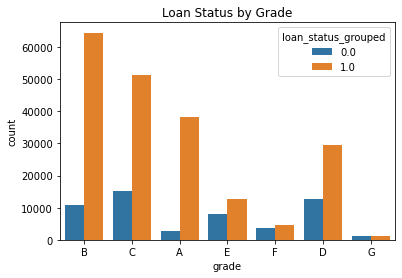

In [19]:
# Count plot for categorical variables against 'loan_status'
sns.countplot(x='grade', hue='loan_status_grouped', data=cleaned_loan, order)
plt.title('Loan Status by Grade')
plt.show()

Most loans fall within grades B, C, and A, indicating that these are the most common credit grades among borrowers. The majority of fully paid loans are concentrated in grades B, C, and A, suggesting that borrowers in these categories are more likely to repay their loans.

However, there is a noticeable presence of default loans in grades B and C, indicating a higher risk of default in these categories compared to A.
While late loans are less frequent across all grades, but they are slightly more common in lower grades like D and E, which could imply higher risk.

Borrowers with lower grades (e.g., F and G) have fewer loans overall, but the relative amount of charged-off and late loans suggests these grades are associated with higher risk.

Overall, credit grade is a significant factor in predicting loan status, with lower grades generally exhibiting higher risk of default or late payment.

#### 4.4 Categorical variables by loan_status

In [20]:
# Extract categorical features from cleaned_loan2
categorical_features = cleaned_loan.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the list of categorical features
print("Categorical Features:", categorical_features)

Categorical Features: ['emp_title', 'emp_length', 'grade', 'home_ownership', 'issue_d', 'loan_status', 'purpose', 'sub_grade', 'term', 'title']


KeyboardInterrupt: 

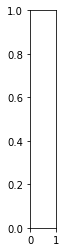

In [125]:
for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)
    sns.countplot(data=cleaned_loan2, x=feature, hue='loan_status')
    plt.title(f'{feature} vs Loan Status')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ERROR dontknow why

Overall, debt consolidation is a prevalent reason for loans but also carries risk with a high number of defaults. Regarding home ownerships, renters and mortgage holders are the most common, with mortgage holders potentially having a slightly better repayment history. Lastly, longer employment correlates with better loan repayment, while shorter employment is riskier.

### 5. Correlation Analysis ###

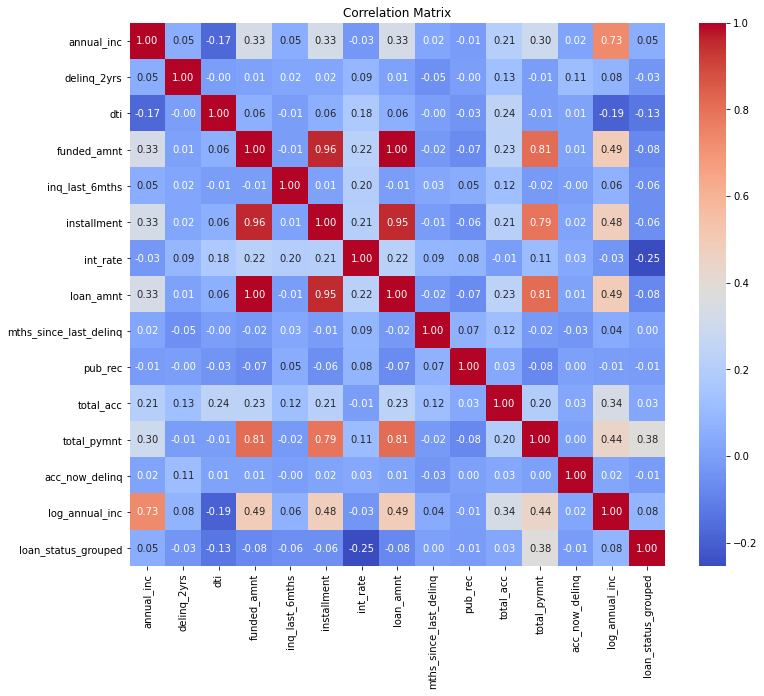

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
corr = cleaned_loan.corr()

# Set the figure size
plt.figure(figsize=(12, 10))  # You can adjust the width and height as needed

# Heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

High positive correlation (>0.9) between Funded Amount, Loan Amount and Installment.

Relatively high correlation (0.70-0.89) between Total Payment and (Funded Amount, Loan Amount and Installment).

Moderate correlation (0.40-0.49) between
1. Log annual income and (Funded Amount, Loan Amount and Installment)
2. Log annual income and Total Payment

### 6. Multivariate Analysis ###

Let's explore if the impact of grade on loan_status changes at different levels of annual_inc.

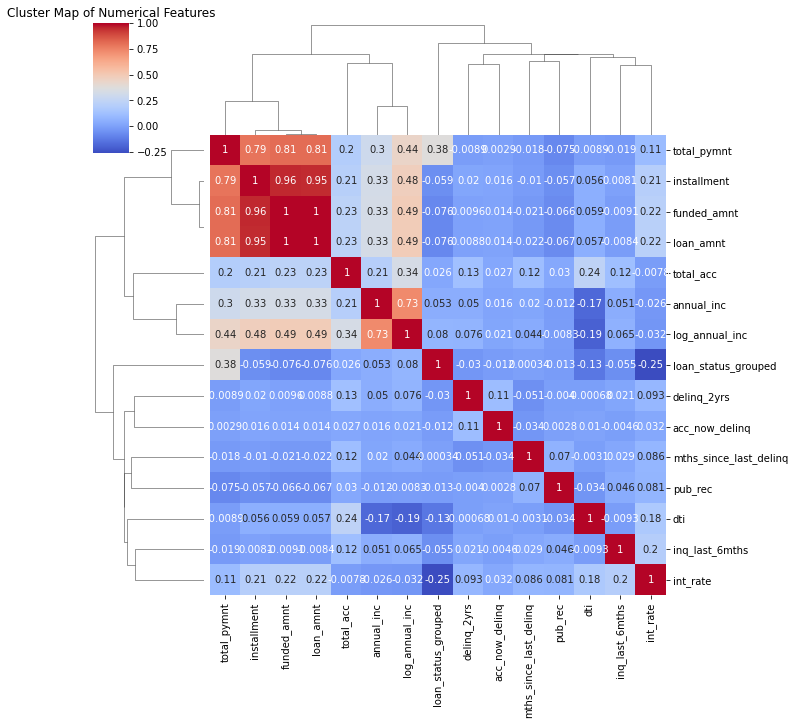

In [22]:
# For numerical data correlation
corr = cleaned_loan[numerical_features].corr()

sns.clustermap(corr, annot=True, cmap='coolwarm')
plt.title('Cluster Map of Numerical Features')
plt.show()

In [ ]:
# Consider how you might handle class imbalance if one loan_status is much more common.
# remove loan_group